<a href="https://colab.research.google.com/github/oecorrechag/neural-network-tensorflow/blob/main/notebooks/class%2013%20-%20recomendaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIMS

Recomendaciones

![image.png](attachment:image.png)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import string
import pandas as pd
import time
import zipfile
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

## Cargar el train y test

In [3]:
# !wget --no-check-certificate https://storage.googleapis.com/platzi-tf2/sign-language-img.zip \
#     -O sign-language-img.zip

In [4]:
# Descomprimimos
local_zip = '/tmp/sign-language-img.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/sign-language-img')
zip_ref.close()

In [5]:
train_dir = "/tmp/sign-language-img/Train"
test_dir = "/tmp/sign-language-img/Test"

## Data Generators

In [6]:
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255, validation_split= 0.2)

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "grayscale",
    subset = "training"
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "grayscale",
    subset = "validation"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "grayscale"
)

Found 27455 images belonging to 24 classes.
Found 1425 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


## Definir las clases

Recordar que hay dos letras que no tenemos J y Z

In [8]:
classes = [char for char in string.ascii_uppercase if char != "J" if char != "Z"]
classes

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y']

## Generate model

In [9]:
model_convolutional = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(75, (3,3), activation = "relu", input_shape= (28, 28, 1)),
              tf.keras.layers.MaxPool2D((2,2)),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(128, kernel_regularizer= regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])

model_convolutional.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 75)        750       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 75)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 12675)             0         
                                                                 
 dense (Dense)               (None, 256)               3245056   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                        

## Training

Entrenemos durante 20 épocas. Esto puede tardar unos minutos en ejecutarse.

In [10]:
model_convolutional.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ['accuracy'])

In [11]:
history = model_convolutional.fit(
    train_generator,
    epochs= 20,
    validation_data = validation_generator
)

Epoch 1/20
215/215 [==============================] - 21s 42ms/step - loss: 1.5845 - accuracy: 0.5214 - val_loss: 0.7953 - val_accuracy: 0.7635
Epoch 2/20
215/215 [==============================] - 9s 40ms/step - loss: 0.3316 - accuracy: 0.9049 - val_loss: 0.6537 - val_accuracy: 0.8042
Epoch 3/20
215/215 [==============================] - 8s 35ms/step - loss: 0.1284 - accuracy: 0.9728 - val_loss: 0.6436 - val_accuracy: 0.8189
Epoch 4/20
215/215 [==============================] - 8s 39ms/step - loss: 0.0742 - accuracy: 0.9879 - val_loss: 0.6572 - val_accuracy: 0.8428
Epoch 5/20
215/215 [==============================] - 8s 39ms/step - loss: 0.0550 - accuracy: 0.9928 - val_loss: 0.6390 - val_accuracy: 0.8512
Epoch 6/20
215/215 [==============================] - 8s 35ms/step - loss: 0.0443 - accuracy: 0.9952 - val_loss: 0.6811 - val_accuracy: 0.8428
Epoch 7/20
215/215 [==============================] - 8s 36ms/step - loss: 0.0407 - accuracy: 0.9960 - val_loss: 0.7125 - val_accuracy: 0.842

## Testing

In [12]:
results = model_convolutional.evaluate(test_generator)

57/57 [==============================] - 2s 38ms/step - loss: 0.7686 - accuracy: 0.8622


## Summary model

In [13]:
def visualizacion_resultados(history):
    epochs = [i for i in range(20)]
    fig, ax = plt.subplots(1,2)
    train_acc = history.history["accuracy"]
    train_loss = history.history["loss"]
    val_acc = history.history["val_accuracy"]
    val_loss = history.history["val_loss"]
    fig.set_size_inches(16, 9)

    ax[0].plot(epochs, train_acc, "go-", label =" Entrenamiento accuracy")
    ax[0].plot(epochs, val_acc, "ro-", label= "Validacion accuracy")
    ax[0].set_title("Entrenamiento & validación accuracy")
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")

    ax[1].plot(epochs, train_loss, "go-", label =" Entrenamiento Loss")
    ax[1].plot(epochs, val_loss, "ro-", label= "Validacion Loss")
    ax[1].set_title("Entrenamiento & validación Loss")
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Loss")

    plt.show()

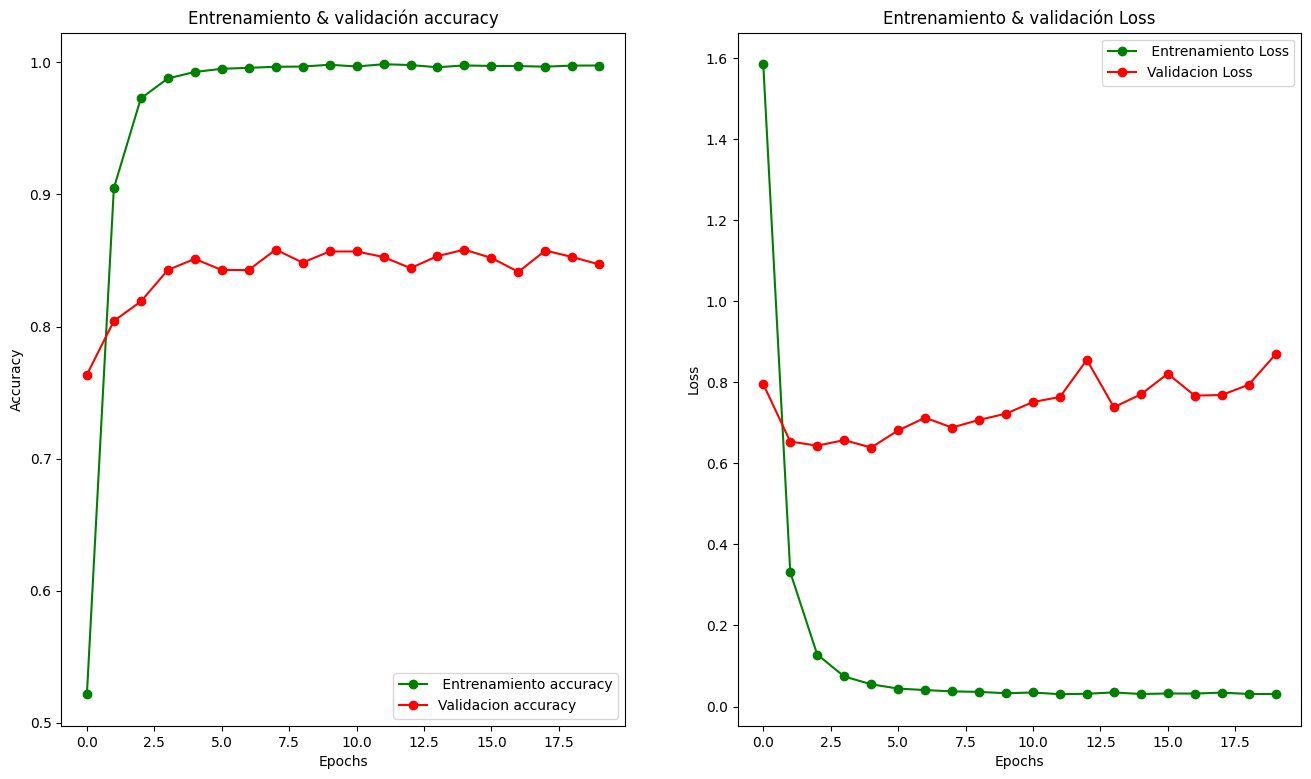

In [14]:
visualizacion_resultados(history)

In [15]:
print('Ok_')

Ok_
